Step 1: Setup and Data Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')  # Replace with your actual file path

Step 2: Data Exploration and Cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

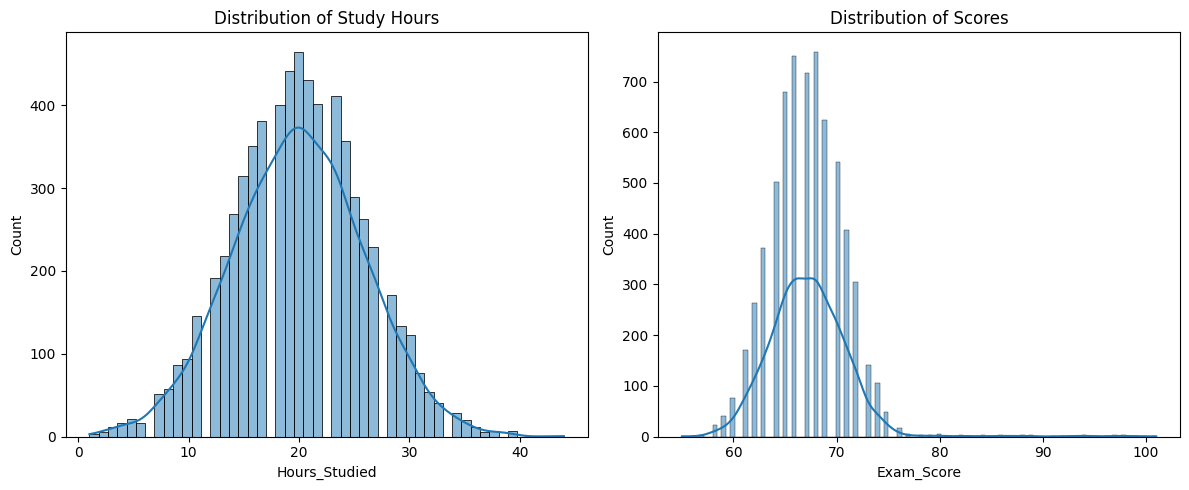

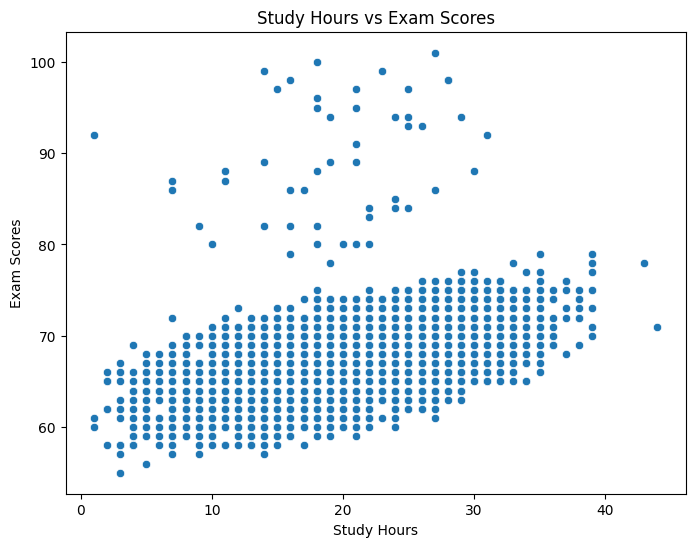

In [8]:
# Display basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of study hours and scores
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Hours_Studied'], kde=True)
plt.title('Distribution of Study Hours')

plt.subplot(1, 2, 2)
sns.histplot(df['Exam_Score'], kde=True)
plt.title('Distribution of Scores')

plt.tight_layout()
plt.show()

# Scatter plot to visualize relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.show()

Step 3: Data Preparation

In [9]:
# Select features and target
X = df[['Hours_Studied']].values
y = df['Exam_Score'].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 5285
Test set size: 1322


Step 4: Linear Regression Model

Linear Regression Performance:
MAE: 2.45
MSE: 10.86
RMSE: 3.29
R2 Score: 0.23


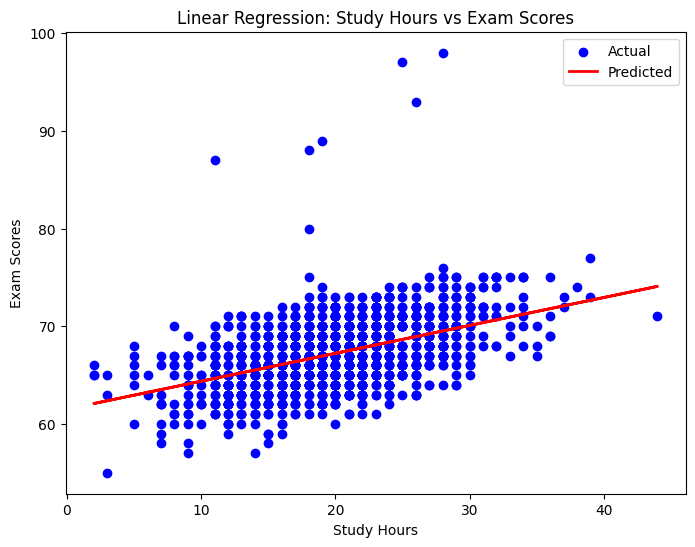

In [10]:
# Create and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.2f}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_lr, color='red', linewidth=2, label='Predicted')
plt.title('Linear Regression: Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.legend()
plt.show()

Step 5: Polynomial Regression (Bonus)


Polynomial Regression Performance:
MAE: 2.44
MSE: 10.84
RMSE: 3.29
R2 Score: 0.23


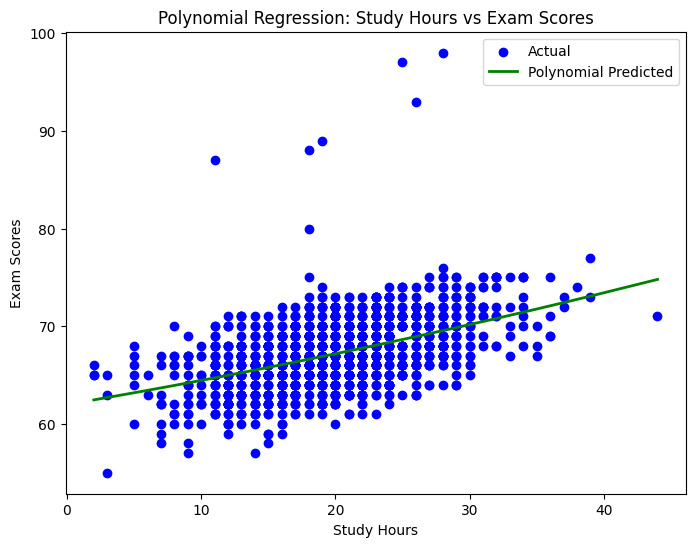

In [11]:
# Transform features to polynomial
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Create and train the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate the model
print("\nPolynomial Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_poly):.2f}")

# Visualize the results
# Sort values for smooth curve
X_test_sorted, y_pred_poly_sorted = zip(*sorted(zip(X_test.flatten(), y_pred_poly)))

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='green', linewidth=2, label='Polynomial Predicted')
plt.title('Polynomial Regression: Study Hours vs Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.legend()
plt.show()